<h1 style="font-size:15"<b><center> Considering Factors Affecting Voter Turnout for US Presidental Elections</center></b></h1>

The intent of this project is to consider voter turnout in light of various laws relating to election administration in the United States to measure whether certain laws affect voter turnout.


Intro: Voting and voting laws have been a very controversal topic in recent years. Some say various measures are necessary to promote and protect integrity of the votes that are cast and others say various laws can be prejudiced against people groups or demographics or discourage voter turnout. Despite the desired intent in a people-representing nation for all voices to be heard, the reality is that typical turnout for United States Presidential elections averages closer to 62% actual turnout considered in ratio to eligable voters (based on average data of the past four Presidential elections of 2008, 2012, 2016 and 2020). 


In an effort to understand this argument better as made on both sides, this project will showcase statistical analysis of several common voting rules to examine how these rules correlate to voter turnout. For example, does online voter registration increase or decrease voter turnout for elections? Or likewise, is requiring a photo identification in any way statistically correlated to higher or lower voter turnout?

In this project, because it seems logical that voting behavior could be influenced by the features of states (for example, maybe more people vote in Alabama vs. Alaska if the weather is better on election day, or maybe soft factors like "attitude towards voting" matter) this project will also consider individual states as variables for voter turnout.


<i>Null Hypothesis: Voting rules to NOT have an significant affect on voting turnout in US Presidential Elections.</i>

In [87]:
#Import Packages 
import pandas as pd
import numpy as np

#Sources: Balletpedia.org (election laws), Census.gov (voter turnout)
#Voting Data Given for Three Separate Presidential Elections, 2012, 2016 and 2020
#Purpose for analyzing data from three separate Presidenitial elections is to allow for 150 total data points
#which can provide meaningful statisical analysis of features and target variable. 

#Voting law data is interpreted as True if allowed or False if not allowed for that state 

#Gather Data

#2012_voting_Data:
US_States_2012 = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
online_voting_reg_2012 = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
early_voting_2012 = [False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, False, False, True, True, False, False, True, False, True, True, True, True, False, False, False, True, False, False, False, False, False, True, True, True, True, False]
no_excuse_abs_2012 = [False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True] #putting false here if "early voting" only means dropping off absentee ballot. 
req_photo_id_2012 = [True, True, True, True, False, False, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, False] #Note: atm, putting True, even if *only* specified for "in-person election day" voting. 

voting_rate_2012 = [58.65, 60.64, 56.35, 52.46, 53.8, 62.59, 63.86, 65.61, 60, 42.52, 59.68, 60.11, 56.18, 68.56, 55.67, 59.51, 59.86, 69.92, 61.4, 65.35, 64.59, 74.16, 53.51, 61.59, 63.45, 61.69, 57.09, 70.31, 59.25, 54.8, 52.4, 64.57, 59.22, 64.55, 52.11, 66.85, 61.26, 58.77, 56.85, 58.69, 51.02, 51.1, 46.4, 64.66, 65.5, 62.46, 50.97, 68.33, 60.09, 50.65]

#Testing lengths of data as accuracy check of data carryover 
#print(len(online_voting_reg_2012))
#print(len(early_voting_2012))
#print(len(no_excuse_abs_2012))
#print(len(req_photo_id_2012))
#print(len(voting_rate_2012))

#2016_voting_Data:
US_States_2016 = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
online_voting_reg_2016 = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, False]
early_voting_2016 = [False, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True] #putting False for DE since only AV's can use this feature
no_excuse_abs_2016 = [False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True] #putting false here if "early voting" only means dropping off absentee ballot. 
req_photo_id_2016 = [True, False, False, True, False, False, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, False] #Note: atm, putting True, even if *only* specified for "in-person election day" voting. 

voting_rate_2016 = [61.9, 58.4, 55.9, 53.3, 57.5, 70.4, 62.7, 67.3, 60.8, 61.9, 51.6, 63.9, 61.5, 59.3, 69.4, 63.3, 59.3, 66.3, 68.6, 65.1, 70.8, 66.8, 73.2, 74.5, 63.9, 65.7, 61.6, 57.9, 69.4, 61.9, 61.6, 58.7, 68.9, 63.9, 63.1, 52.4, 67.6, 61.6, 62.5, 64.7, 61, 55.7, 53.8, 57, 63.3, 66.9, 65.6, 47.8, 73.6, 58.9]

#Testing lengths of data as accuracy check of data carryover 
#print(len(online_voting_reg_2012))
#print(len(early_voting_2012))
#print(len(no_excuse_abs_2012))
#print(len(req_photo_id_2012))
#print(len(voting_rate_2012))


#2020_voting_Data
US_States_2020 = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
online_voting_reg_2020 = [True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, False]
early_voting_2020 = [False, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True] #putting False for DE since only AV's can use this feature
no_excuse_abs_2020 = [False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True] #putting false here if "early voting" only means dropping off absentee ballot. 
req_photo_id_2020 = [True, False, False, True, False, False, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, False] #Note: atm, putting True, even if *only* specified for "in-person election day" voting. 
voting_rate_2020 = [61.30, 60.70, 79.9, 54.00, 79.88, 78.33, 79.70, 68.86, 77.17, 66.20, 69.65, 81.20, 72.14, 65.00, 75.77, 63.90, 59.7, 69.49, 76.20, 74.63, 76.00, 71.00, 79.10, 60.40, 69.75, 81.33, 76.00, 78.22, 73.50, 72.00, 68.67, 69.70, 77.40, 62.65, 73.99, 54.40, 81.97, 70.93, 67.60, 73.88, 73.88, 68.60, 66.73, 90.09, 73.27, 74.60, 84.14, 56.40, 72.30, 62.60]

#Testing lengths of data as accuracy check of data carryover 
#print(len(online_voting_reg_2012))
#print(len(early_voting_2012))
#print(len(no_excuse_abs_2012))
#print(len(req_photo_id_2012))
#print(len(voting_rate_2012))

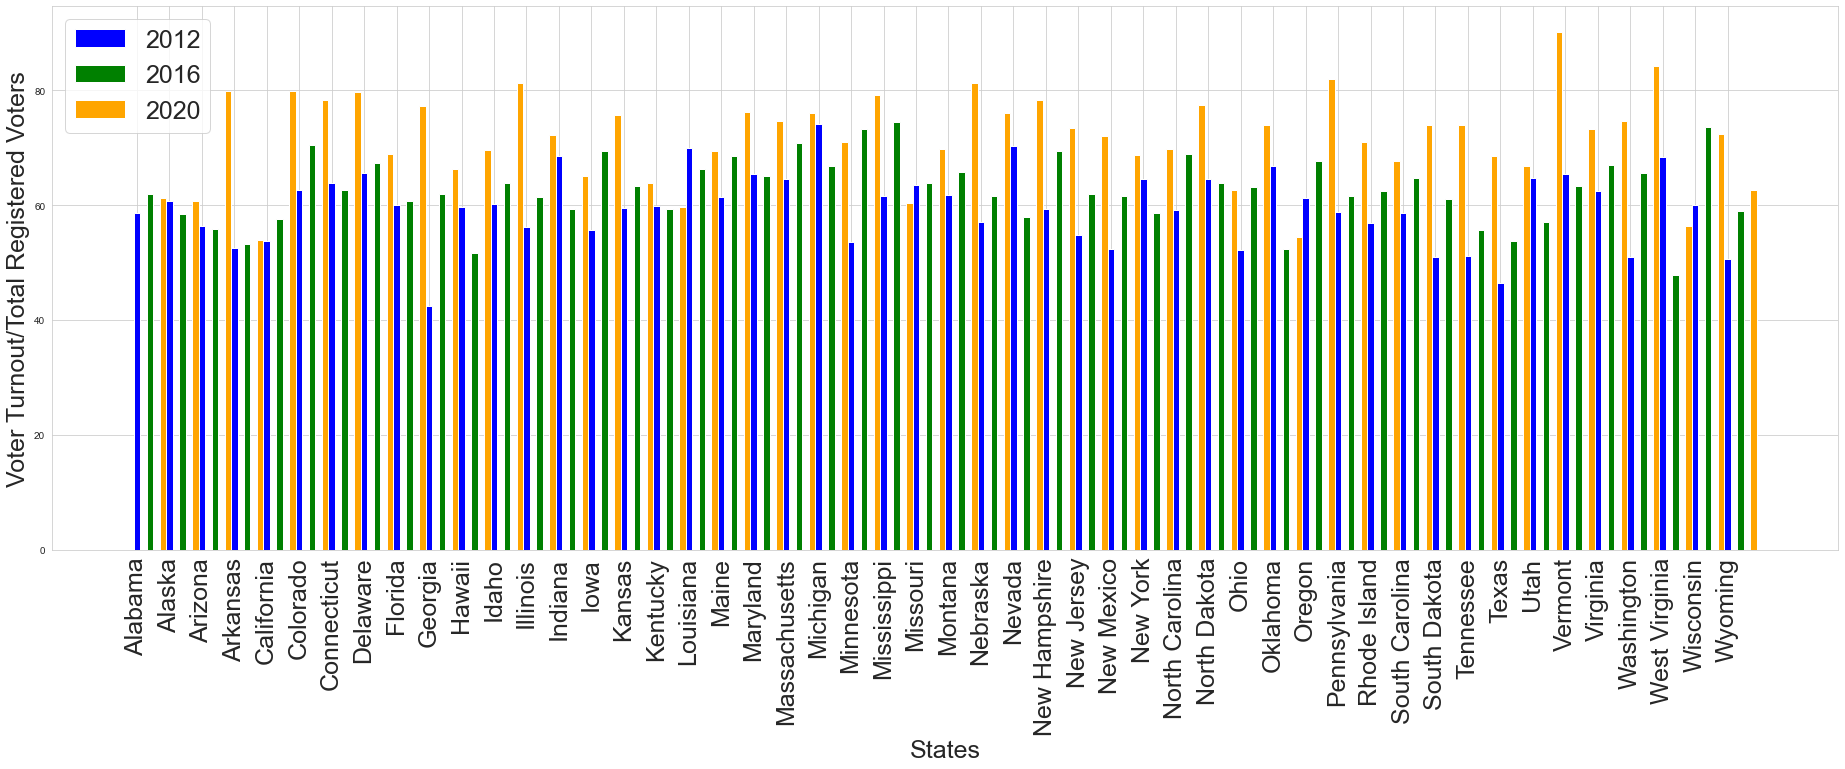

In [88]:
# Visualize the Data 

#Now producing bar graph of voter percentage turnout by election year per state, to help visualize differences

voting_rate_2012 = [58.65, 60.64, 56.35, 52.46, 53.8, 62.59, 63.86, 65.61, 60, 42.52, 59.68, 60.11, 56.18, 68.56, 55.67, 59.51, 59.86, 69.92, 61.4, 65.35, 64.59, 74.16, 53.51, 61.59, 63.45, 61.69, 57.09, 70.31, 59.25, 54.8, 52.4, 64.57, 59.22, 64.55, 52.11, 66.85, 61.26, 58.77, 56.85, 58.69, 51.02, 51.1, 46.4, 64.66, 65.5, 62.46, 50.97, 68.33, 60.09, 50.65]
voting_rate_2016 = [61.9, 58.4, 55.9, 53.3, 57.5, 70.4, 62.7, 67.3, 60.8, 61.9, 51.6, 63.9, 61.5, 59.3, 69.4, 63.3, 59.3, 66.3, 68.6, 65.1, 70.8, 66.8, 73.2, 74.5, 63.9, 65.7, 61.6, 57.9, 69.4, 61.9, 61.6, 58.7, 68.9, 63.9, 63.1, 52.4, 67.6, 61.6, 62.5, 64.7, 61, 55.7, 53.8, 57, 63.3, 66.9, 65.6, 47.8, 73.6, 58.9]
voting_rate_2020 = [61.30, 60.70, 79.9, 54.00, 79.88, 78.33, 79.70, 68.86, 77.17, 66.20, 69.65, 81.20, 72.14, 65.00, 75.77, 63.90, 59.7, 69.49, 76.20, 74.63, 76.00, 71.00, 79.10, 60.40, 69.75, 81.33, 76.00, 78.22, 73.50, 72.00, 68.67, 69.70, 77.40, 62.65, 73.99, 54.40, 81.97, 70.93, 67.60, 73.88, 73.88, 68.60, 66.73, 90.09, 73.27, 74.60, 84.14, 56.40, 72.30, 62.60]


States = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

import matplotlib.pyplot as plt
import numpy as np  

#X = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

X_axis = np.arange(len(States))
  
plt.bar(X_axis + 0.0, voting_rate_2012, 0.2, label = '2012', color = "blue")
plt.bar(X_axis + 0.4, voting_rate_2016, 0.2, label = '2016', color = "green")
plt.bar(X_axis + 0.8, voting_rate_2020, 0.2, label = '2020', color = "orange")
  
plt.xticks(X_axis, States)
plt.xlabel("States", fontsize = 25)
plt.ylabel("Voter Turnout/Total Registered Voters", fontsize = 25)
plt.xticks(rotation=90, fontsize = 25)
plt.legend(fontsize = 25)

from pylab import rcParams
rcParams['figure.figsize'] = 32,10
plt.show()


In [89]:
# Create Dataframe from 2012 Voter Data 

# This cell compiles individual lists of 2012 election data into a dataframe 
zipped_2012 = list(zip(US_States_2012, online_voting_reg_2012, early_voting_2012, no_excuse_abs_2012, req_photo_id_2012, voting_rate_2012))
df_2012 = pd.DataFrame(zipped_2012, columns=['US_States', 'Online_Reg', 'Early_Voting', 'No_Excuse_Absentee', 'Require_PhotoID', 'Voting_Rate'])
df_2012['Year'] = 2012
df_2012.head(20)

,US_States,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Voting_Rate,Year
0,Alabama,False,False,False,True,58.65,2012
1,Alaska,False,True,True,True,60.64,2012
2,Arizona,False,True,True,True,56.35,2012
3,Arkansas,False,True,True,True,52.46,2012
4,California,False,True,True,False,53.80,2012
5,Colorado,False,True,True,False,62.59,2012
6,Connecticut,False,False,False,False,63.86,2012
7,Delaware,False,False,True,False,65.61,2012
8,Florida,False,True,True,True,60.00,2012
9,Georgia,False,True,True,True,42.52,2012


In [90]:
# Create Dataframe from 2016 Voter Data 

#This cell compiles individual lists of 2016 election data into a dataframe 
zipped_2016 = list(zip(US_States_2016, online_voting_reg_2016, early_voting_2016, no_excuse_abs_2016, req_photo_id_2016, voting_rate_2016))
df_2016 = pd.DataFrame(zipped_2016, columns=['US_States', 'Online_Reg', 'Early_Voting', 'No_Excuse_Absentee', 'Require_PhotoID', 'Voting_Rate'])
#print(online_voting_reg_2016)
df_2016['Year'] = 2016
df_2016.head(20)
#set(df_2016["Online_Reg"])

,US_States,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Voting_Rate,Year
0,Alabama,True,False,False,True,61.9,2016
1,Alaska,True,True,True,False,58.4,2016
2,Arizona,True,True,True,False,55.9,2016
3,Arkansas,True,True,False,True,53.3,2016
4,California,True,True,True,False,57.5,2016
5,Colorado,True,True,True,False,70.4,2016
6,Connecticut,True,False,False,False,62.7,2016
7,Delaware,True,False,True,False,67.3,2016
8,Florida,True,True,True,True,60.8,2016
9,Georgia,True,True,True,True,61.9,2016


In [91]:
# Create Dataframe from 2020 Voter Data 

#This cell compiles individual lists of 2020 election data into a dataframe 
zipped_2020 = list(zip(US_States_2020, online_voting_reg_2020, early_voting_2020, no_excuse_abs_2020, req_photo_id_2020, voting_rate_2020))
df_2020 = pd.DataFrame(zipped_2020, columns=['US_States', 'Online_Reg', 'Early_Voting', 'No_Excuse_Absentee', 'Require_PhotoID', 'Voting_Rate'])
df_2020['Year'] = 2020
df_2020.head(20)

,US_States,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Voting_Rate,Year
0,Alabama,True,False,False,True,61.30,2020
1,Alaska,True,True,True,False,60.70,2020
2,Arizona,True,True,True,False,79.90,2020
3,Arkansas,False,True,False,True,54.00,2020
4,California,True,True,True,False,79.88,2020
5,Colorado,True,True,True,False,78.33,2020
6,Connecticut,True,False,False,False,79.70,2020
7,Delaware,True,False,True,False,68.86,2020
8,Florida,True,True,True,True,77.17,2020
9,Georgia,True,True,True,True,66.20,2020


In [92]:
# Concatenate all 2012, 2012, and 2020 dataframes into one joint dataframe 

dfs_concat_v = pd.concat([df_2012, df_2016, df_2020], axis=0, ignore_index = True)
dfs_concat_v

#reassign for name clarity 
df_pre_dummy = dfs_concat_v
set(df_pre_dummy["Online_Reg"])

{False, True}

In [7]:
# Check info on dataframe to confirm datatypes and length to confirm concatenation successful. 
#dfs_concat_v.info()

In [8]:
#dfs_concat_v.describe

This boxplot is a quick test of median value of (this feature).... 

,mean,std
Online_Reg,,
False,61.065217,7.329588
True,67.575679,8.112645


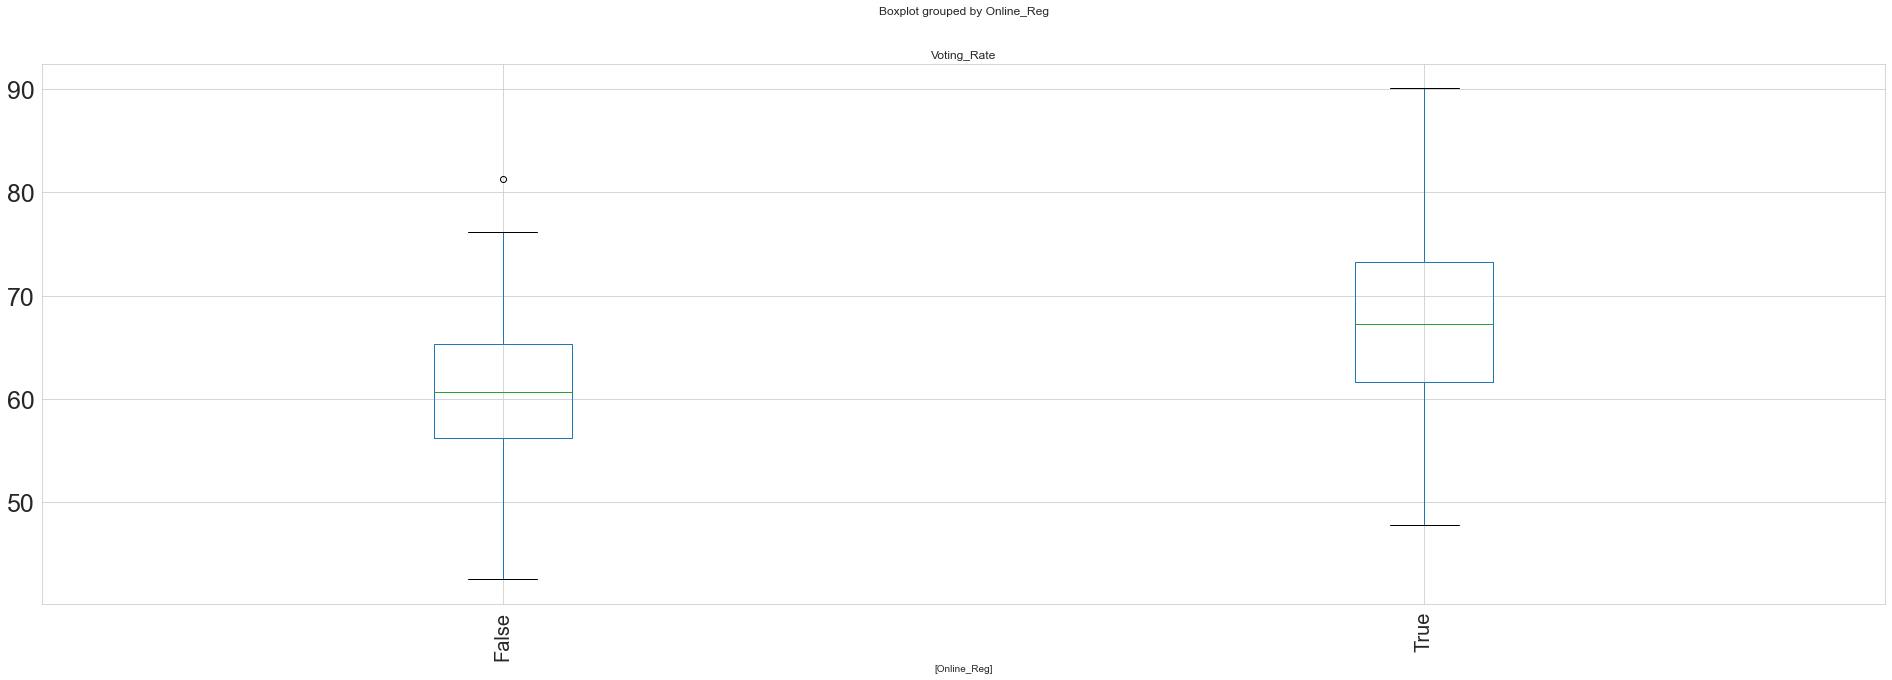

In [93]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['Online_Reg'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 


plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)


pd.DataFrame(df_pre_dummy.groupby( ['Online_Reg'])['Voting_Rate'].describe().loc[:,['mean','std']])


In [94]:
from scipy import stats
rng = np.random.default_rng()

In [95]:
rvs1 = df_pre_dummy[df_pre_dummy["Online_Reg"]==True]["Voting_Rate"]
rvs2 = df_pre_dummy[df_pre_dummy["Online_Reg"]==False]["Voting_Rate"]
stats.ttest_ind(rvs1, rvs2)
#print(std.rvs1)
#print(std.rvs2)
#mean value usually 
#Alpha set to 95% 
#mean value and see if significant 
#p_Value
#difference of means is 5 standard deviation... 

#t test: 
    
    #sampes are independent 
    #dist is normal 
    #and then p value and relate to alpha. 

Ttest_indResult(statistic=5.11943095883277, pvalue=9.387632177186671e-07)

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

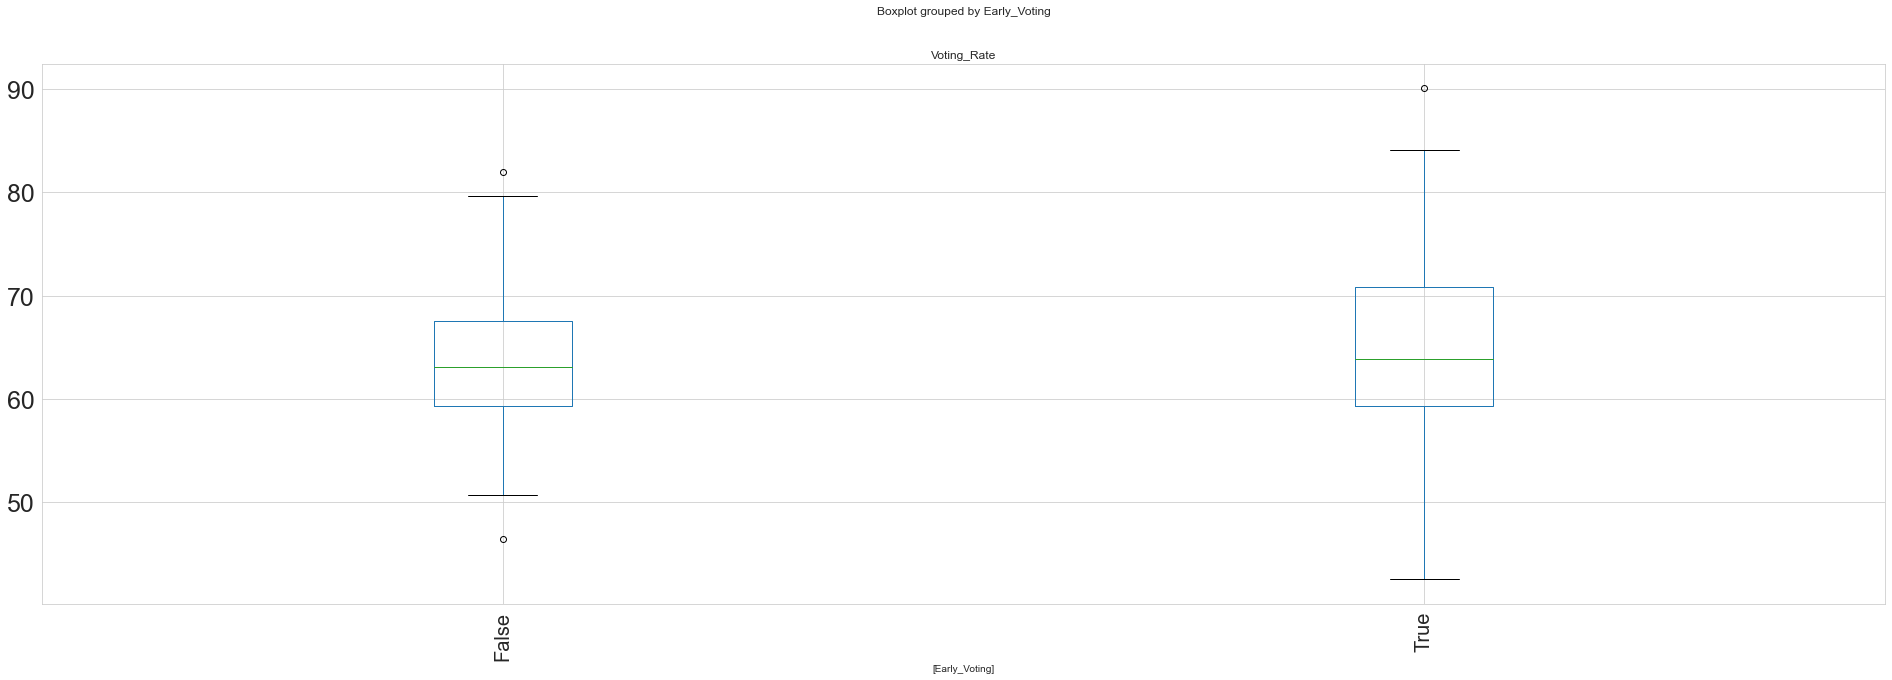

In [99]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['Early_Voting'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 
pd.DataFrame(df_pre_dummy.groupby( ['Early_Voting'])['Voting_Rate'].describe().loc[:,['mean','std']])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)
#Add ticks marks to box plots... info 


In [100]:
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=5.11943095883277, pvalue=9.387632177186671e-07)

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

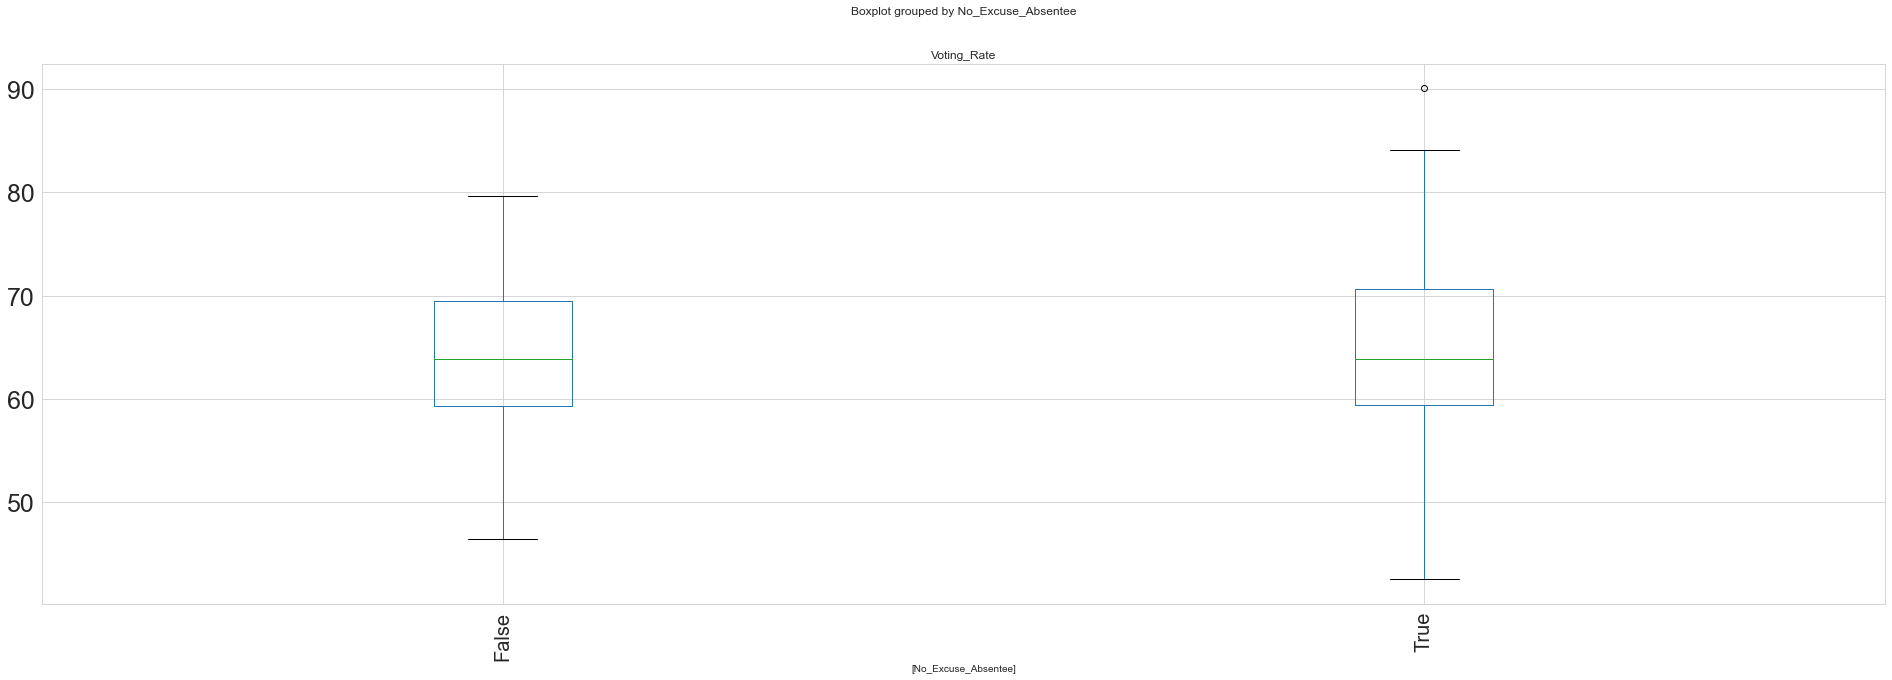

In [102]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['No_Excuse_Absentee'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 
pd.DataFrame(df_pre_dummy.groupby( ['No_Excuse_Absentee'])['Voting_Rate'].describe().loc[:,['mean','std']])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)


(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

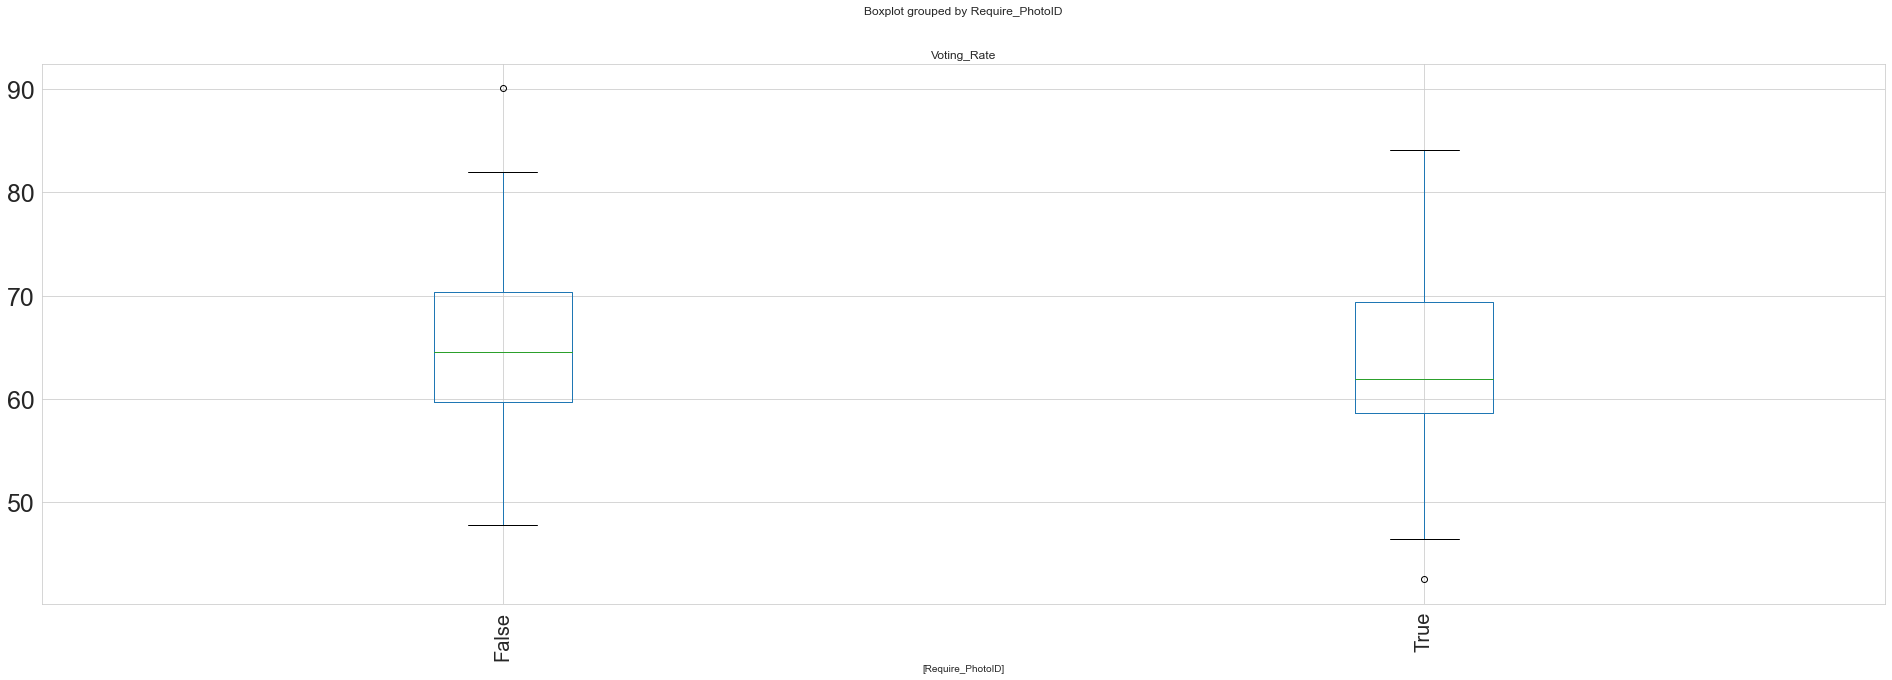

In [103]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['Require_PhotoID'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 
pd.DataFrame(df_pre_dummy.groupby( ['Require_PhotoID'])['Voting_Rate'].describe().loc[:,['mean','std']])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)


,Online_Reg
Online_Reg,
False,69
True,81


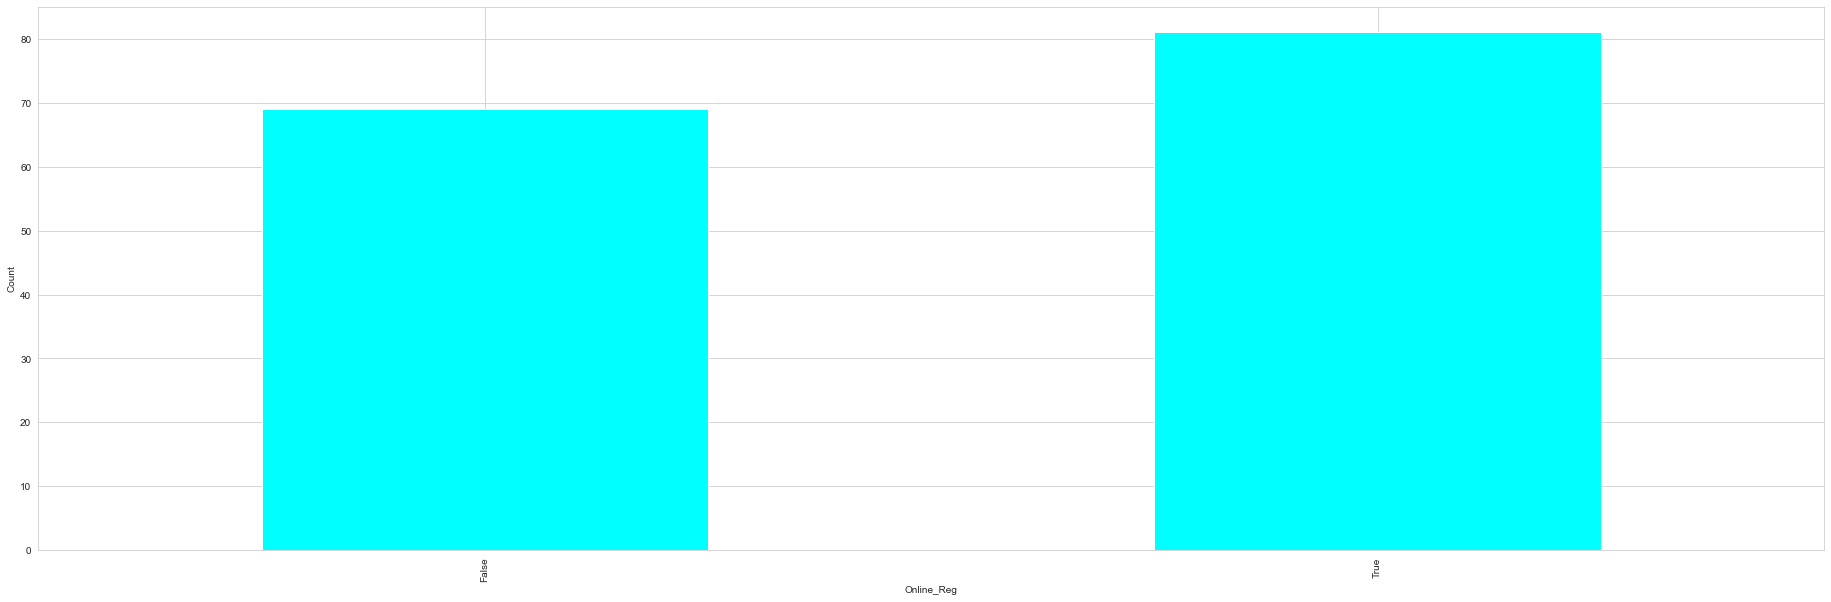

In [104]:
import matplotlib.pyplot as plt
df_pre_dummy.groupby(['Online_Reg'])['Online_Reg'].count().plot(kind='bar', color = "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['Online_Reg' ])[['Online_Reg']].count()

,Early_Voting
Early_Voting,
False,42
True,108


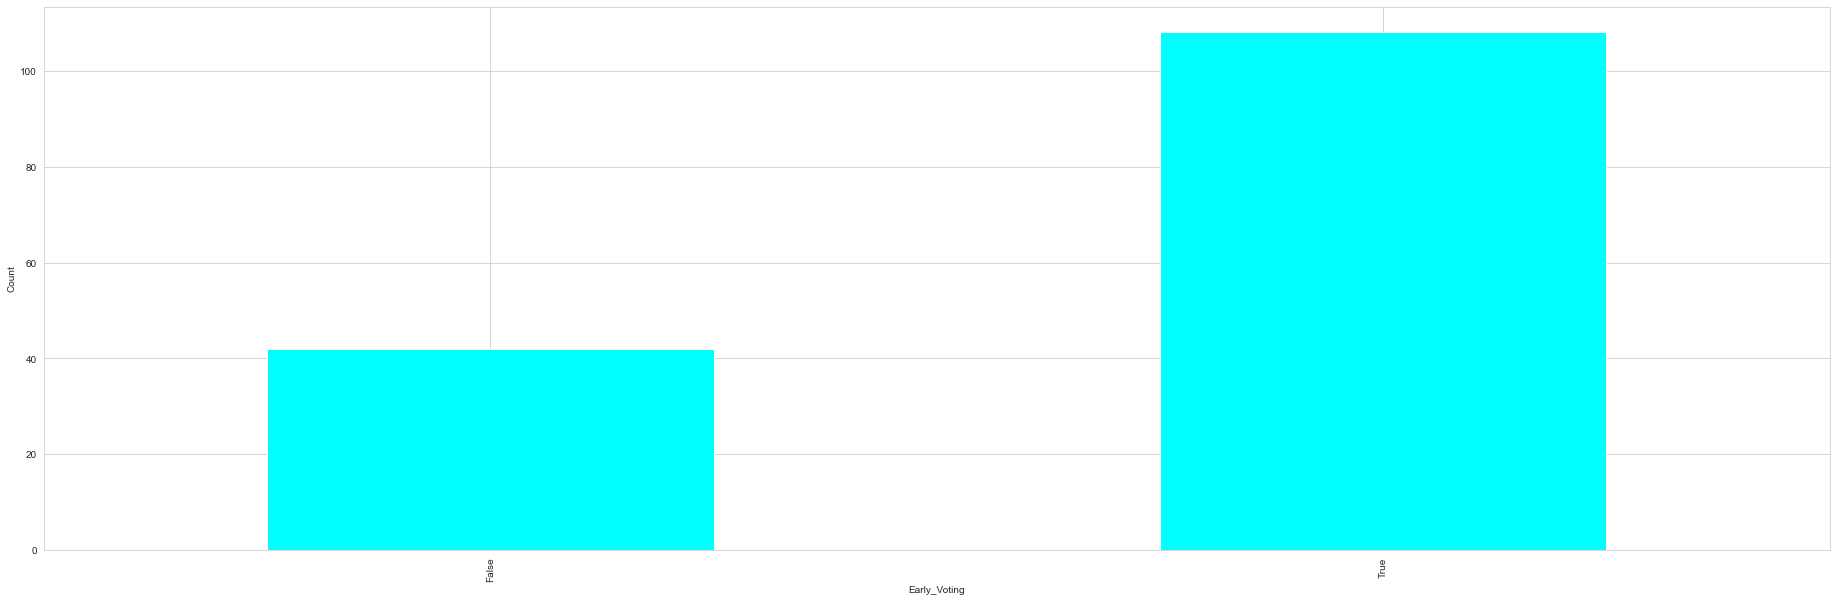

In [105]:
df_pre_dummy.groupby(['Early_Voting'])['Early_Voting'].count().plot(kind='bar', color= "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['Early_Voting' ])[['Early_Voting']].count()

,No_Excuse_Absentee
No_Excuse_Absentee,
False,47
True,103


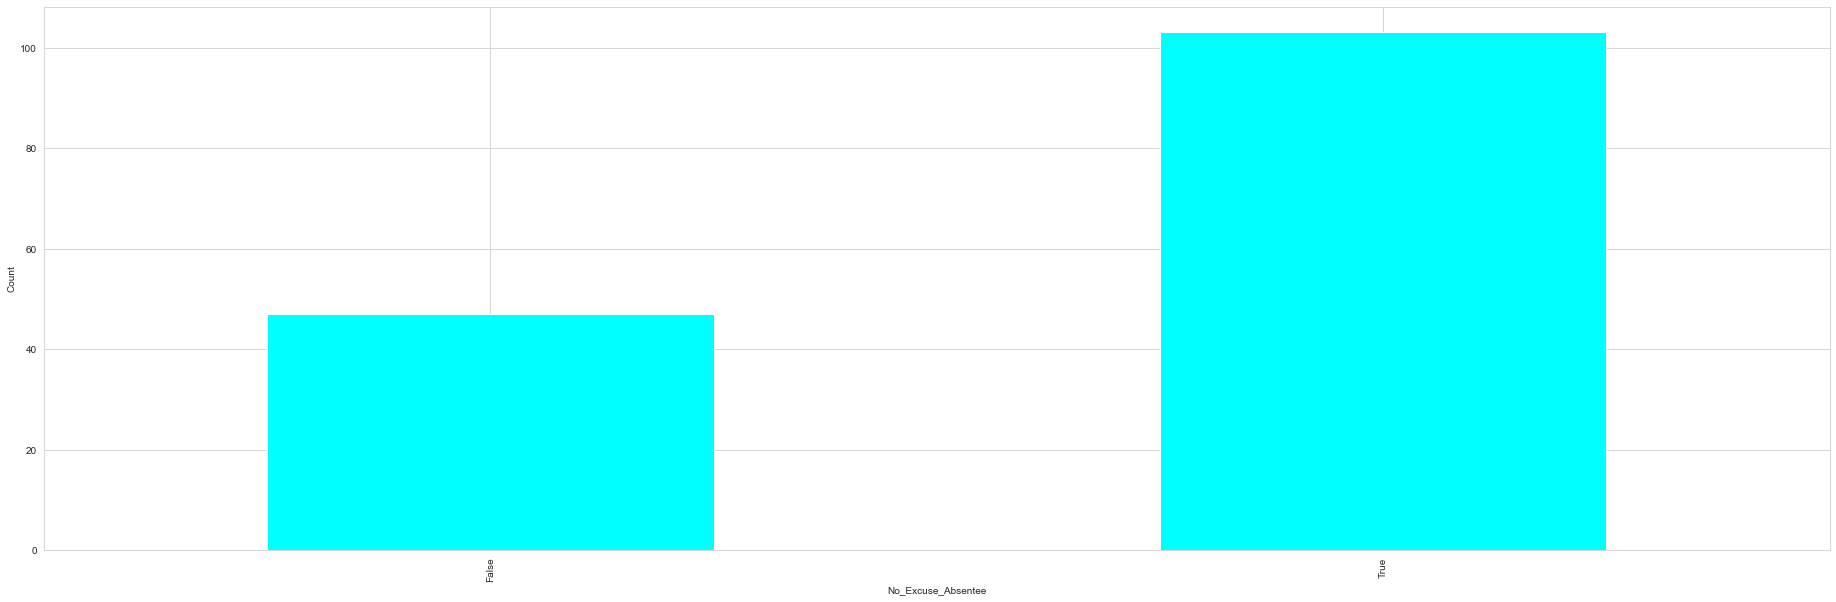

In [106]:
df_pre_dummy.groupby(['No_Excuse_Absentee'])['No_Excuse_Absentee'].count().plot(kind='bar', color = "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['No_Excuse_Absentee'])[['No_Excuse_Absentee']].count()

,Require_PhotoID
Require_PhotoID,
False,97
True,53


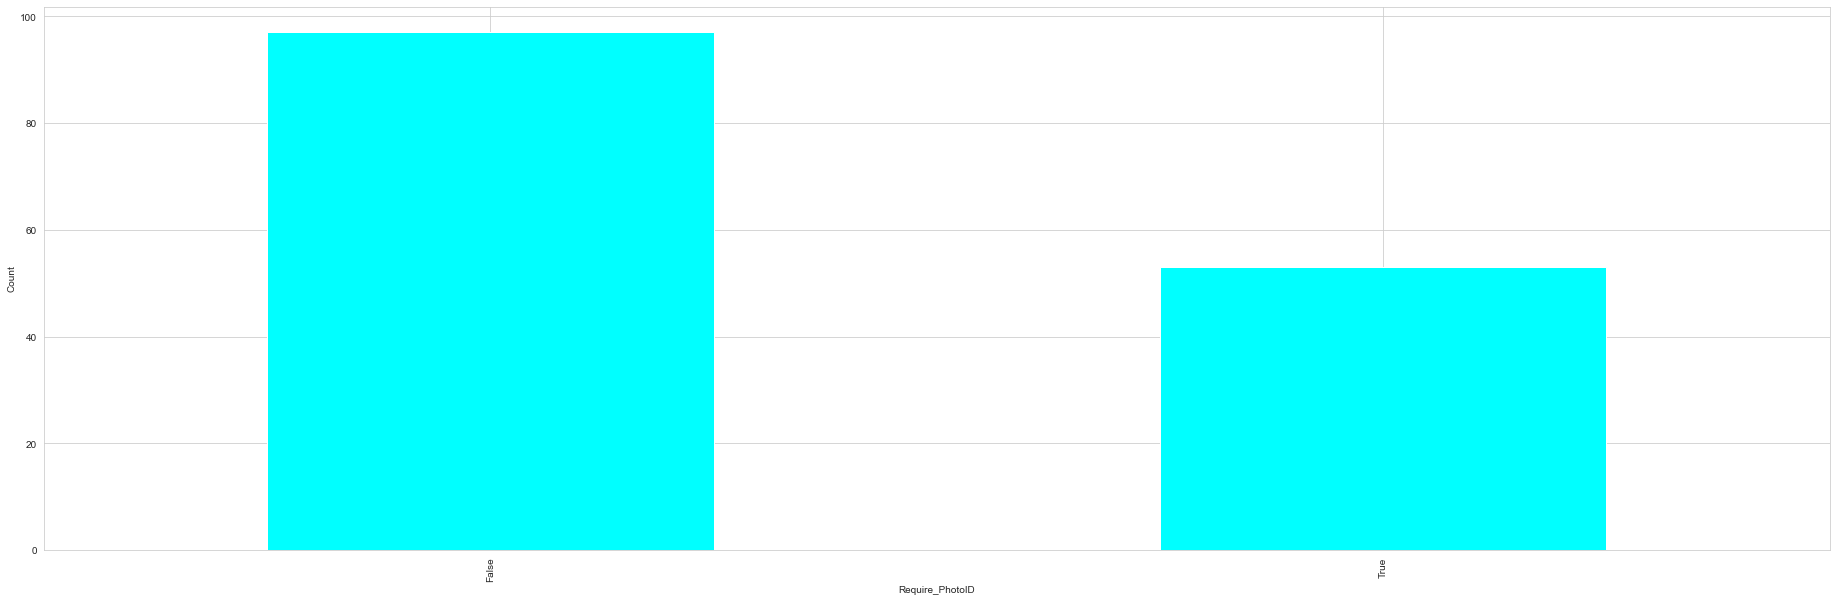

In [107]:
df_pre_dummy.groupby(['Require_PhotoID'])['Require_PhotoID'].count().plot(kind='bar', color = "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['Require_PhotoID'])[['Require_PhotoID']].count()